Для выполнения работы был взят датасет: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset?resource=download

In [20]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Загрузка данных ===
df = pd.read_csv('adult.csv', header=None)
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status',
              'occupation','relationship','race','sex','capital-gain','capital-loss',
              'hours-per-week','native-country','income']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K


In [30]:
# Убрали лишние пробелы во всех категориальных столбцах
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

# Привели числовые столбцы к типу int64
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
print("\nРаспределение дохода после обработки:")
print(df['income'].value_counts())
# Кодируем income в числовой вид
df['income'] = pd.factorize(df['income'])[0]

# Удалили строки с пропусками только после проверки
df = df.dropna()
df.reset_index(drop=True, inplace=True)


Распределение дохода после обработки:
1    37109
2    11681
0        1
Name: income, dtype: int64


In [22]:
# Получим сводную информацию по набору данных.
print('Кол-во пропусков:')
for i in df.columns:
    print(i,'=',sum([1 if j == ' ?' else 0 for j in df[i]]))
print("Кол-во дубликатов -> ",df.duplicated().sum())
df = df.drop_duplicates()
print("Кол-во дубликатов после удаления -> ",df.duplicated().sum())
print("Размер данных: ",df.shape)
print("Сводная информация: ")
df.info()

Кол-во пропусков:
age = 0
workclass = 0
fnlwgt = 0
education = 0
education-num = 0
marital-status = 0
occupation = 0
relationship = 0
race = 0
sex = 0
capital-gain = 0
capital-loss = 0
hours-per-week = 0
native-country = 0
income = 0
Кол-во дубликатов ->  52
Кол-во дубликатов после удаления ->  0
Размер данных:  (48791, 15)
Сводная информация: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48791 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48791 non-null  int32 
 1   workclass       48791 non-null  object
 2   fnlwgt          48791 non-null  int32 
 3   education       48791 non-null  object
 4   education-num   48791 non-null  int32 
 5   marital-status  48791 non-null  object
 6   occupation      48791 non-null  object
 7   relationship    48791 non-null  object
 8   race            48791 non-null  object
 9   sex             48791 non-null  object
 10  capital-gai

In [23]:
df = df.drop(['native-country','occupation'],axis=1)
df.loc[df['workclass']==' ?','workclass'] = ' Private'
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,0,workclass,0,education,0,marital-status,relationship,race,gender,0,0,0,0
1,25,Private,226802,11th,7,Never-married,Own-child,Black,Male,0,0,40,1
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,0,50,1
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Husband,White,Male,0,0,40,2
4,44,Private,160323,Some-college,10,Married-civ-spouse,Husband,Black,Male,7688,0,40,2


In [24]:
# Факторизуем пол и доход в 1 и 0
df['sex'] = pd.factorize(df['sex'])[0]
df['income'] = pd.factorize(df['income'])[0]
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,0,workclass,0,education,0,marital-status,relationship,race,0,0,0,0,0
1,25,Private,226802,11th,7,Never-married,Own-child,Black,1,0,0,40,1
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Husband,White,1,0,0,50,1
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Husband,White,1,0,0,40,2
4,44,Private,160323,Some-college,10,Married-civ-spouse,Husband,Black,1,7688,0,40,2


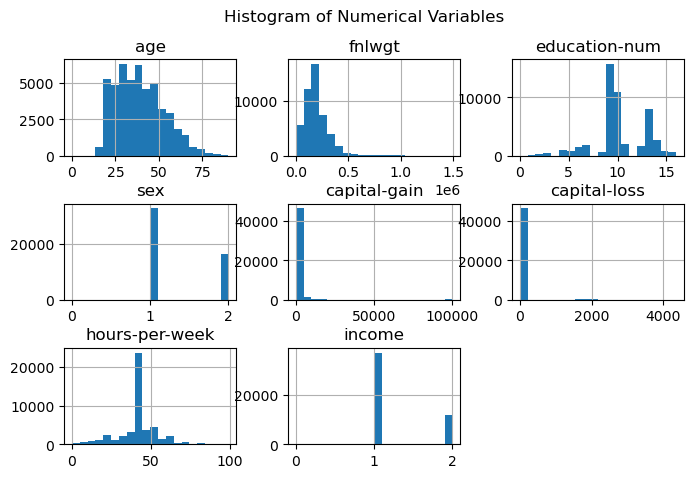

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма распределения числовых переменных
df.hist(figsize=(8, 5), bins=20)
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Histogram of Numerical Variables')
plt.show()

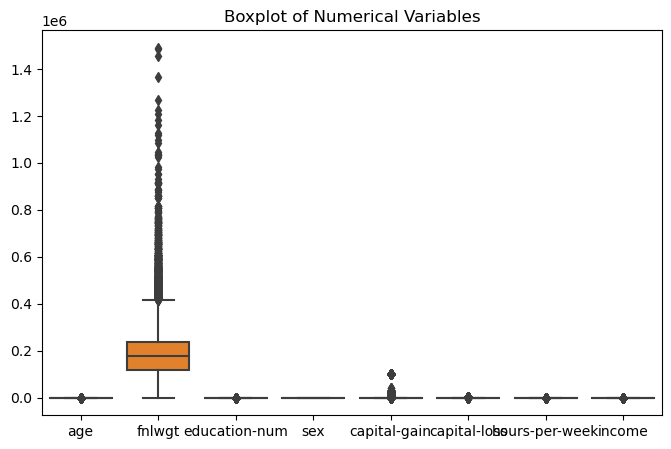

In [26]:
# Boxplot для числовых переменных
plt.figure(figsize=(8, 5))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Boxplot of Numerical Variables')
plt.show()

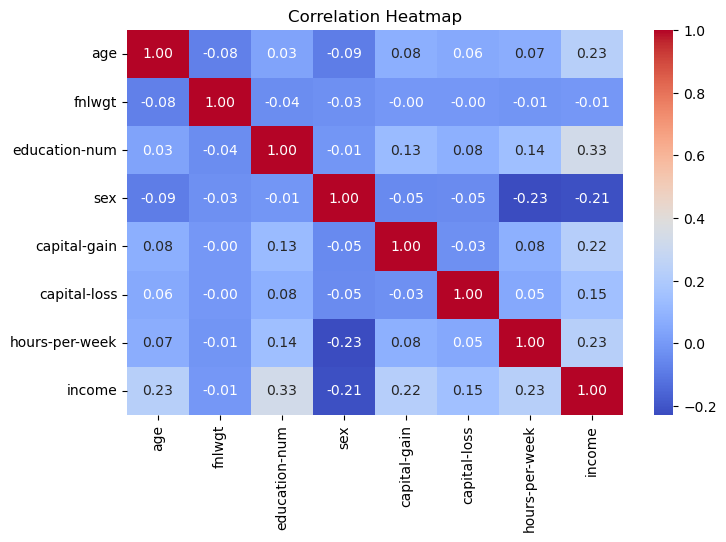

In [27]:
# Тепловая карта корреляции числовых переменных
plt.figure(figsize=(8, 5))

# Выбираем только числовые столбцы для расчета корреляции
numeric_df = df.select_dtypes(include=[np.number])

# Строим тепловую карту только для числовых данных
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

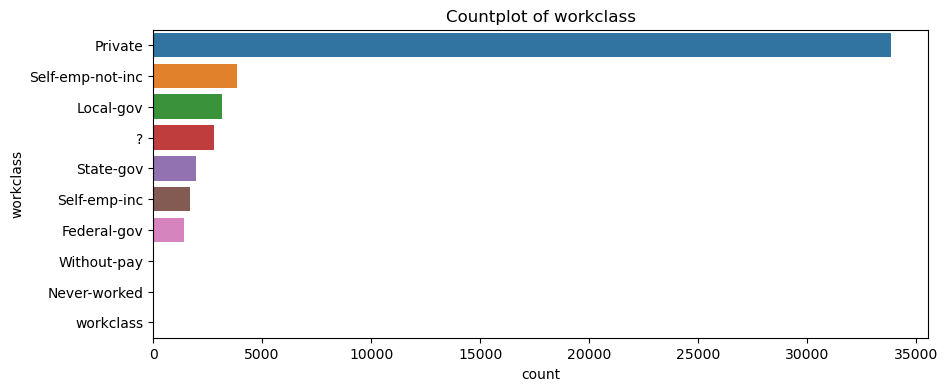

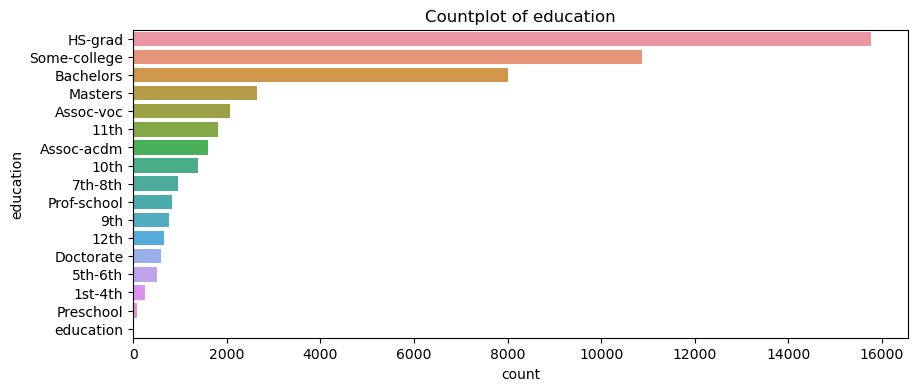

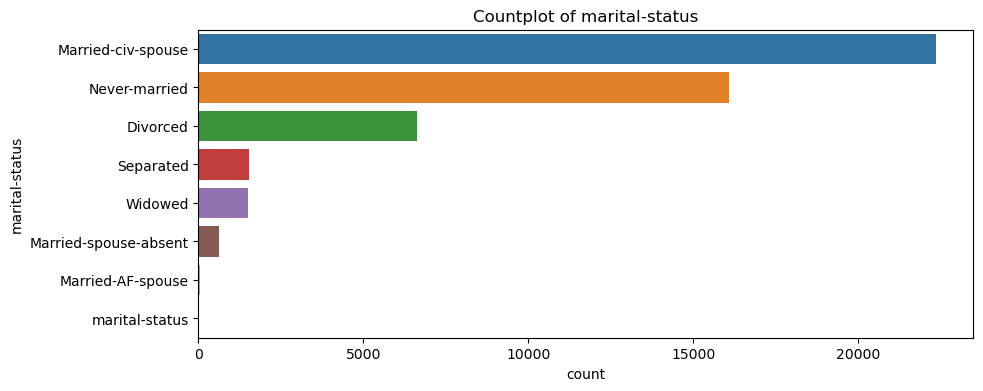

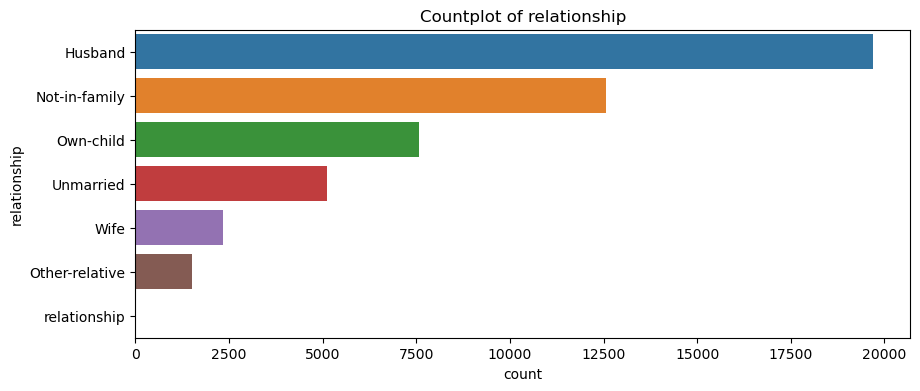

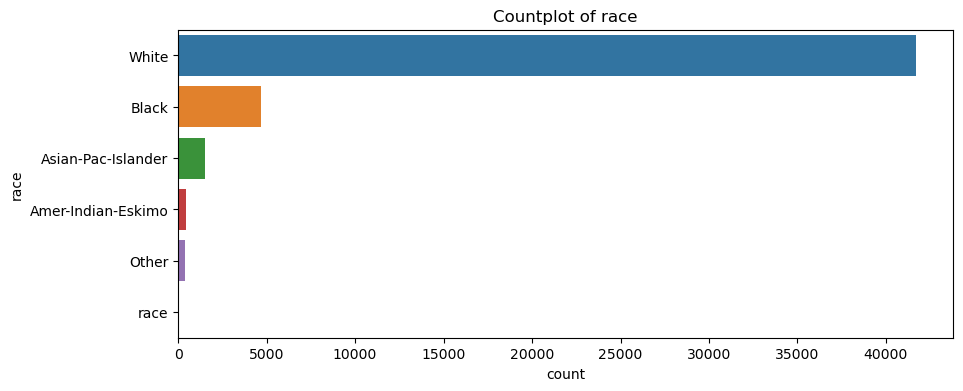

In [28]:
# Диаграмма частот для категориальных переменных
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.show()

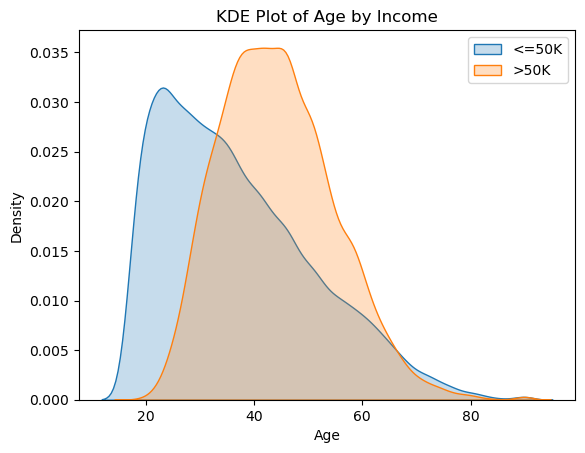

In [32]:
# Теперь строим KDE
sns.kdeplot(data=df[df['income'] == 1]['age'], label='<=50K', shade=True)
sns.kdeplot(data=df[df['income'] == 2]['age'], label='>50K', shade=True)

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE Plot of Age by Income')
plt.legend()
plt.show()

Данный график можно интерпретировать так: Если на графике KDE для income = 1 пик приходится на возраст 40-45 лет, это может означать, что люди в этом возрастном диапазоне с большей вероятностью имеют доход >50K, соответствующий 1. Если же для income = 0 кривая имеет пик в возрасте 20-25 лет, это может означать, что более молодые люди с большей вероятностью имеют доход <=50k, соответствующий 0.

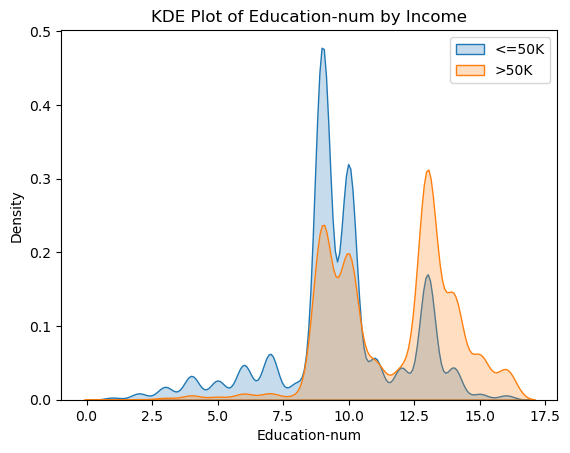

In [34]:
sns.kdeplot(data=df[df['income'] == 1]['education-num'], label='<=50K', shade=True)
sns.kdeplot(data=df[df['income'] == 2]['education-num'], label='>50K', shade=True)
plt.xlabel('Education-num')
plt.ylabel('Density')
plt.title('KDE Plot of Education-num by Income')
plt.legend()
plt.show()

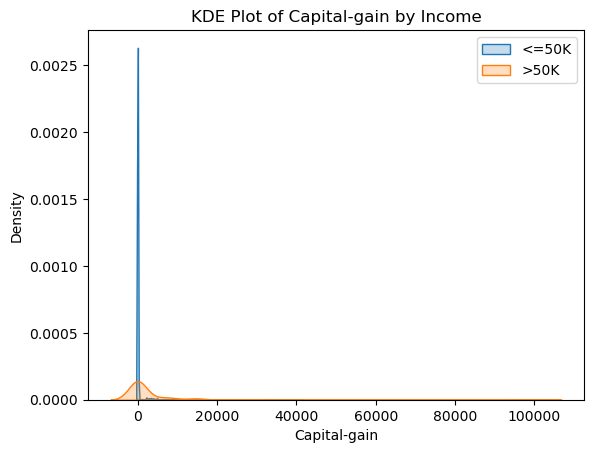

In [35]:
sns.kdeplot(data=df[df['income'] == 1]['capital-gain'], label='<=50K', shade=True)
sns.kdeplot(data=df[df['income'] == 2]['capital-gain'], label='>50K', shade=True)
plt.xlabel('Capital-gain')
plt.ylabel('Density')
plt.title('KDE Plot of Capital-gain by Income')
plt.legend()
plt.show()

Графики выше интерпретируются схожим образом.

In [36]:
# Перевели оставшиеся категории в значения (1,0) посредством one-hot-encoding.
df = pd.get_dummies(df, columns=['workclass','education','marital-status','relationship','race'])
df.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,relationship_relationship,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,race_race
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,25,226802,7,1,0,0,40,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,38,89814,9,1,0,0,50,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,28,336951,12,1,0,0,40,2,0,0,...,0,0,0,0,0,0,0,0,1,0
4,44,160323,10,1,7688,0,40,2,0,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
# Разделили данные
from sklearn.model_selection import train_test_split

X = df.drop(['income'],axis=1).values
Y = df['income'].values

# Разделили на тестовую и обучающую выборки в соотношении 80% : 20%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Для решения задачи классификации будут использоваться следующие модели машинного обучения: tabnet / xgboost / lightgbm / catboost. Подбираем для них гиперпараметры и обучаем на тренировочном наборе данных.

In [41]:
# Подключили необходимые библиотеки для моделей
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.inspection import permutation_importance

# Привели все данные к float32 / int64
X_train = np.array(X_train).astype(np.float32)
y_train = np.array(y_train).astype(np.int64)
X_test = np.array(X_test).astype(np.float32)
y_test = np.array(y_test).astype(np.int64)

# Определили модели и параметры

# TabNet
tabnet_params = {
    'n_d': 8,                    
    'n_a': 8,                    
    'n_steps': 5,                 
    'gamma': 1.5,                 
    'lambda_sparse': 0.001,       
    'optimizer_fn': torch.optim.Adam,
    'optimizer_params': dict(lr=1e-2),  
    'mask_type': 'sparsemax',     
    'verbose': 0,                 
    'device_name': 'cuda' if torch.cuda.is_available() else 'cpu'
}

tabnet_model = TabNetClassifier(**tabnet_params)

# XGBoost
xgb_params = {
    'n_estimators': 200,          
    'learning_rate': 0.05,        
    'max_depth': 8,               
    'scale_pos_weight': (len(y_train) - sum(y_train)) / sum(y_train),
    'subsample': 0.8,             
    'colsample_bytree': 0.8,      
    'random_state': 42,
    'verbose': 0
}

xgb_model = XGBClassifier(**xgb_params)

# LightGBM
lgb_params = {
    'n_estimators': 200,          
    'learning_rate': 0.05,        
    'max_depth': 8,               
    'is_unbalance': True,         
    'subsample': 0.8,             
    'colsample_bytree': 0.8,      
    'random_state': 42,
    'verbose': -1
}

lgb_model = LGBMClassifier(**lgb_params)

# CatBoost
catboost_params = {
    'iterations': 200,
    'learning_rate': 0.05,
    'depth': 8,
    'auto_class_weights': 'Balanced',
    'subsample': 0.8,
    'bootstrap_type': 'Bernoulli',
    'random_state': 42,
    'verbose': 0
}

catboost_model = CatBoostClassifier(**catboost_params)

# Обучаем
tabnet_model.fit(
    X_train, y_train,
    max_epochs=60,               
    batch_size=4096,              
    num_workers=0,
    drop_last=False
)
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)

# Прогнозируем на тестовом наборе данных
tabnet_preds = tabnet_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
lgb_preds = lgb_model.predict(X_test)
catboost_preds = catboost_model.predict(X_test)

# Рассчитываем метрики качества
def evaluate_model(y_test, preds, model_name):
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, preds)
    avg_precision = average_precision_score(y_test, preds)
    
    print(f"Метрики для {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print(f"Average Precision Score: {avg_precision:.4f}\n")
    print('-' * 50)

evaluate_model(y_test, tabnet_preds, "TabNet")
evaluate_model(y_test, xgb_preds, "XGBoost")
evaluate_model(y_test, lgb_preds, "LightGBM")
evaluate_model(y_test, catboost_preds, "CatBoost")

Метрики для TabNet:
Accuracy: 0.8428
Precision: 0.8643
Recall: 0.9420
F1 Score: 0.9015
ROC AUC Score: 0.7321
Average Precision Score: 0.7347

--------------------------------------------------
Метрики для XGBoost:
Accuracy: 0.8715
Precision: 0.8961
Recall: 0.9408
F1 Score: 0.9179
ROC AUC Score: 0.7941
Average Precision Score: 0.7320

--------------------------------------------------
Метрики для LightGBM:
Accuracy: 0.8701
Precision: 0.8933
Recall: 0.9424
F1 Score: 0.9172
ROC AUC Score: 0.7893
Average Precision Score: 0.7328

--------------------------------------------------
Метрики для CatBoost:
Accuracy: 0.8183
Precision: 0.9551
Recall: 0.7997
F1 Score: 0.8705
ROC AUC Score: 0.8391
Average Precision Score: 0.6957

--------------------------------------------------


XGBoost является наиболее сбалансированной моделью среди всех, с хорошими значениями Recall и Precision, что приводит к высокому F1 Score. Эта модель лучше всего подходит для задач, где важно поддерживать баланс между точностью и полнотой.

TabNet демонстрирует наивысшую точность, но его низкие значения Recall могут быть проблематичны в задачах, где важно правильно идентифицировать положительные классы.

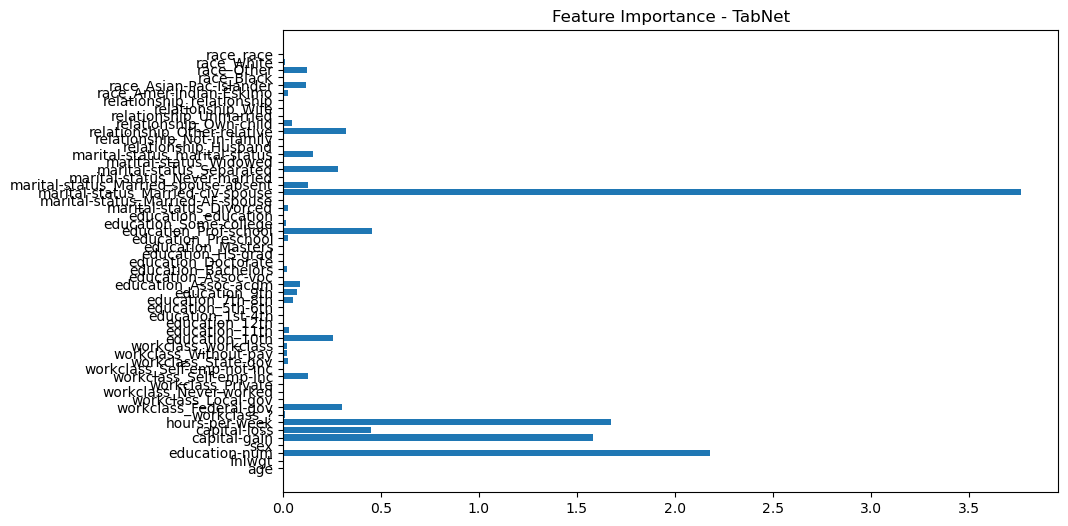

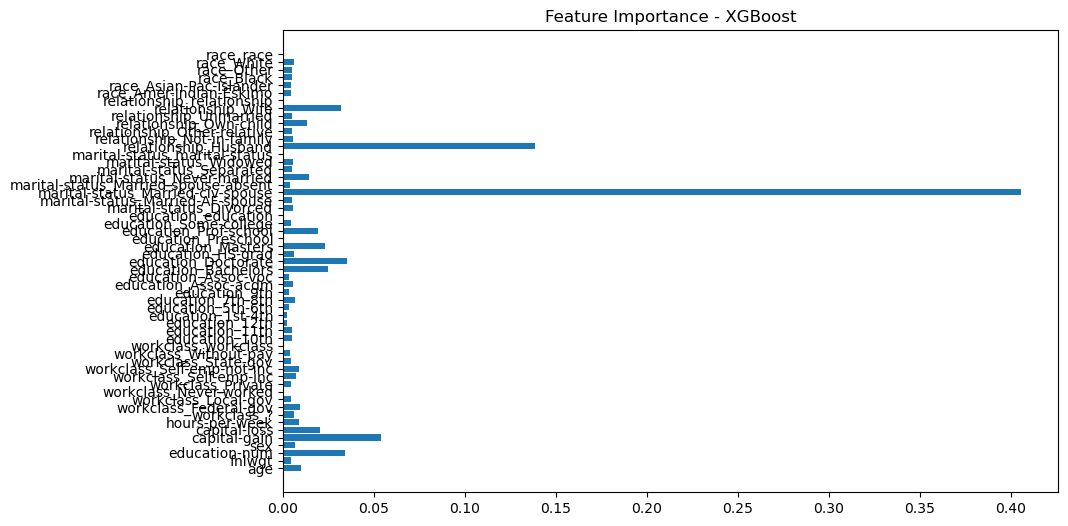

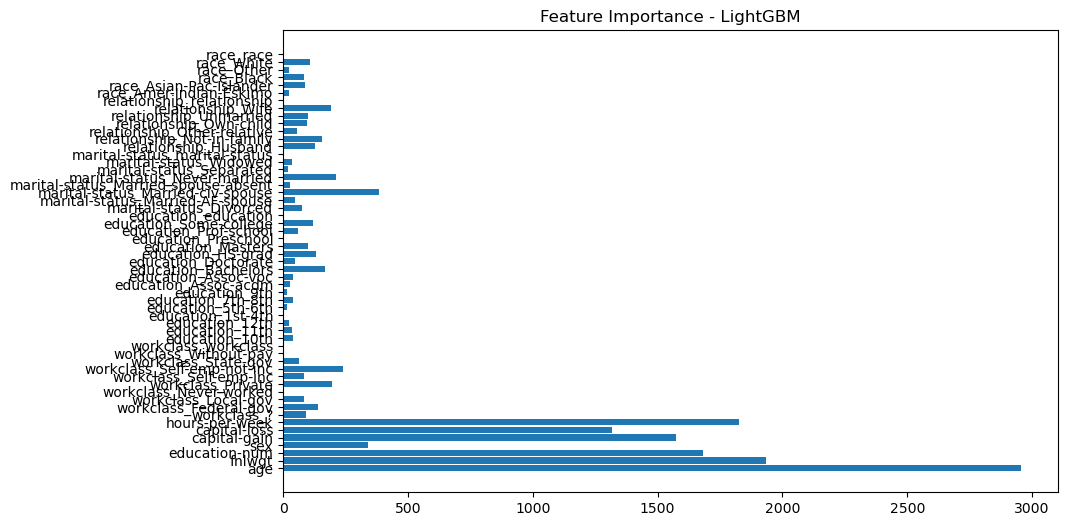

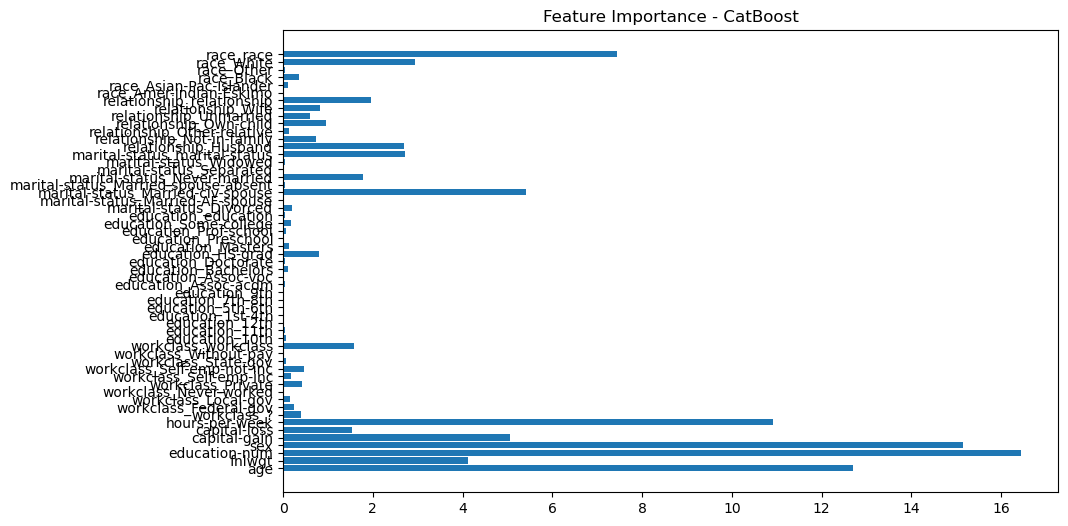

In [43]:
# Получаем важность признаков с использованием метода explain
explain_matrix, masks = tabnet_model.explain(X_test)

# Усредняем важность признаков по всем сэмплам
feature_importance = explain_matrix.mean(axis=0)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(df.drop(['income'], axis=1).columns, feature_importance)
plt.title('Feature Importance - TabNet')
plt.show()

# Важность признаков для XGBoost
xgb_importance = xgb_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(df.drop(['income'], axis=1).columns, xgb_importance)
plt.title('Feature Importance - XGBoost')
plt.show()

# Важность признаков для LightGBM
lgb_importance = lgb_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(df.drop(['income'], axis=1).columns, lgb_importance)
plt.title('Feature Importance - LightGBM')
plt.show()

# Важность признаков для CatBoost
catboost_importance = catboost_model.get_feature_importance()
plt.figure(figsize=(10, 6))
plt.barh(df.drop(['income'], axis=1).columns, catboost_importance)
plt.title('Feature Importance - CatBoost')
plt.show()

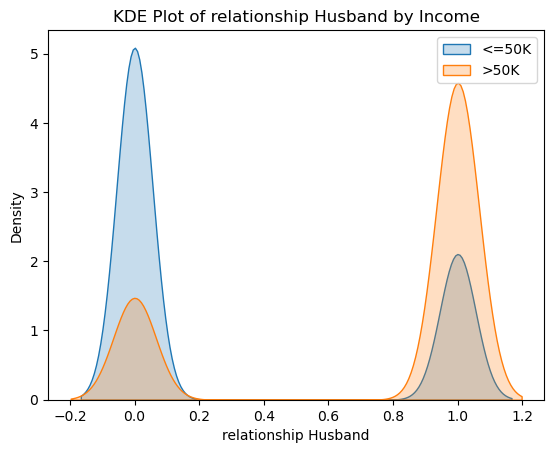

In [46]:
sns.kdeplot(data=df[df['income'] == 1]['relationship_Husband'], label='<=50K', shade=True)
sns.kdeplot(data=df[df['income'] == 2]['relationship_Husband'], label='>50K', shade=True)
plt.xlabel('relationship Husband')
plt.ylabel('Density')
plt.title('KDE Plot of relationship Husband by Income')
plt.legend()
plt.show()

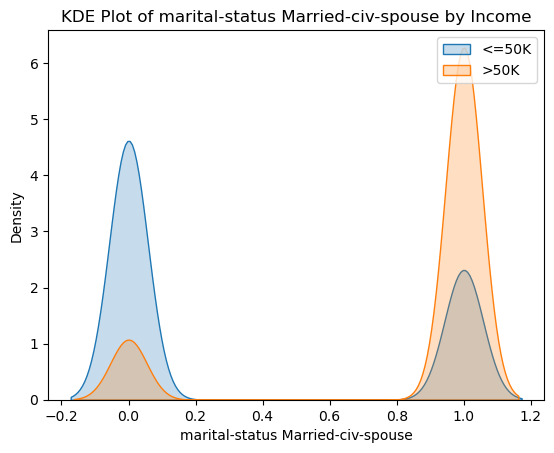

In [47]:
sns.kdeplot(data=df[df['income'] == 1]['marital-status_Married-civ-spouse'], label='<=50K', shade=True)
sns.kdeplot(data=df[df['income'] == 2]['marital-status_Married-civ-spouse'], label='>50K', shade=True)
plt.xlabel('marital-status Married-civ-spouse')
plt.ylabel('Density')
plt.title('KDE Plot of marital-status Married-civ-spouse by Income')
plt.legend()
plt.show()

Общий анализ выполненной работы

1. Подготовка и исследование данных
На этапе предварительной обработки были устранены пропущенные значения и дубликаты, проведена кодировка категориальных признаков с помощью факторизации и метода one-hot-encoding.
Также был выполнен разведочный анализ данных, в ходе которого построены графики распределения (гистограммы), диаграммы размаха (boxplot), тепловые карты корреляций и графики частот встречаемости значений.

2. Построение моделей машинного обучения
Для решения задачи бинарной классификации обучены четыре модели: TabNet, XGBoost, LightGBM и CatBoost.
При настройке моделей учтены особенности выборки — большой объём данных и наличие дисбаланса классов. Для каждой из моделей подобраны оптимальные гиперпараметры, обеспечивающие их стабильное обучение и прогнозирование.

3. Сравнительная оценка качества моделей
Для всех обученных моделей рассчитаны метрики эффективности: точность (Accuracy), Precision, Recall, F1 Score, ROC AUC и Average Precision.
Анализ результатов показал следующее:
TabNet достиг наивысшего значения Accuracy, однако его Precision и Recall оказались ниже, что сказалось на итоговом значении F1 Score.
Модель XGBoost обеспечила лучший баланс между полнотой и точностью, показав самый высокий F1 Score.
LightGBM и CatBoost характеризуются высоким уровнем Recall, но более низкими значениями Precision, что также повлияло на значение F1 Score.

4. Анализ интерпретируемости моделей
Для всех моделей реализован анализ важности признаков, основанный на встроенных методах интерпретации.
Для модели TabNet применён специализированный метод explain, который позволил выявить ключевые переменные, влияющие на принятие решений моделью.